In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter
from IPython.display import Image

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

print(sys.version)

now = datetime.now()
print("last run on " + str(now))

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
last run on 2019-02-06 19:50:08.684247


In [2]:
# define directories
baseDir = os.getcwd()
dataDir = r"D:\Dropbox\AcademiaDropbox\SonicationBehavior\SonBehData\\SonicationBehaviorTrials_NoImages"

In [3]:
os.chdir(dataDir)


In [4]:
fldrs = [f for f in os.listdir(".") if not f.startswith('.')]
len(fldrs) # should be 232

232

In [5]:
fldrs.sort(key=lambda x: os.path.getmtime(x)) # sort by time created


In [7]:
FlightIncludedFolder = "D:\Dropbox\AcademiaDropbox\SonicationBehavior\SonBehData\\BuzzesPlusFlights"


## combine csv's all into a single file
csvDir = FlightIncludedFolder

csvFiles = [f for f in os.listdir(csvDir) if f.endswith('.csv')]

np_array_list = []
for file_ in csvFiles:
    df = pd.read_csv(os.path.join(csvDir, file_),index_col=None, header=None)
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.columns = ['index', 'freq', 'amp', 'datetime', 'rewNum', 'rewTF', 'lowRewAmp', 'highrewAmp', 'BeeNumCol', 'accFile']

big_frame.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile
0,1,130,0.07139,2016_11_28__11_08_33_618,0,F,0,5,BeeBlue2_28Nov2016_Hive4_high,2016_11_28__11_08_33_618_395_450_test.txt
1,2,120,0.07204,2016_11_28__11_09_16_734,0,F,0,5,BeeBlue2_28Nov2016_Hive4_high,2016_11_28__11_09_16_734_395_450_test.txt
2,3,400,0.10449,2016_11_28__11_09_43_099,1,T,0,5,BeeBlue2_28Nov2016_Hive4_high,2016_11_28__11_09_43_099_395_450_test.txt
3,4,420,0.30211,2016_11_28__11_09_43_694,2,T,0,5,BeeBlue2_28Nov2016_Hive4_high,2016_11_28__11_09_43_694_395_450_test.txt
4,5,350,0.17133,2016_11_28__11_09_44_424,2,F,0,5,BeeBlue2_28Nov2016_Hive4_high,2016_11_28__11_09_44_424_395_450_test.txt


In [150]:
big_frame.BeeNumCol[1].split("Bee")

['', 'Blue2_28Nov2016_Hive4_high']

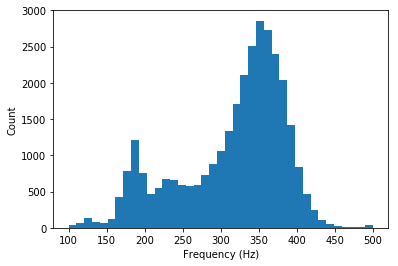

In [140]:

bins = np.linspace(100, 500, 40)

plt.hist(np.array(big_frame.freq.astype(int)), bins= bins)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Count")
#plt.yticks([])
plt.ylim([0, 3000])
#plt.vlines(x = 220, ymin = 0, ymax = 120000, linestyle = "--", color = "grey", linewidth = 1 )
#plt.ylim([0, 120])
plt.savefig(r"C:\Users\calli\Desktop\BuzzDataHist.png", width = 5, height = 3.5, dpi = 300)
plt.show()

plt.show()

In [141]:
from sklearn import mixture

# gaussian mixture
gmm = mixture.GaussianMixture(
        n_components=2, covariance_type='tied')

In [181]:
gmm.fit(np.array(big_frame.freq.astype(int)).reshape(-1,1)) 

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [182]:

probPred = (gmm.predict_proba(np.array(big_frame.freq.astype(int)).reshape(-1,1)) > 0.01)[:,0]

In [183]:
probPred

array([False, False,  True, ...,  True,  True,  True])

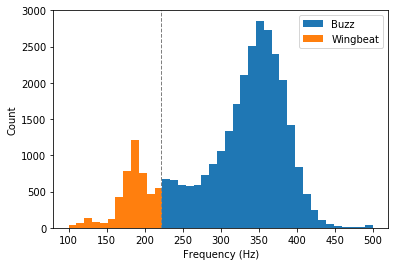

In [193]:
bins = np.linspace(100, 500, 40)

plt.hist(np.array(big_frame.freq.astype(int))[probPred], bins= bins, label = "Buzz")
plt.hist(np.array(big_frame.freq.astype(int))[~probPred], bins= bins, label = "Wingbeat")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Count")
plt.legend(loc='upper right')

#plt.yticks([])
plt.vlines(x = 222, ymin = 0, ymax = 3000, linestyle = "--", color = "grey", linewidth = 1 )
plt.ylim([0, 3000])
plt.savefig(r"C:\Users\calli\Desktop\BuzzDataHist_decision.png", width = 5, height = 3.5, dpi = 300)
plt.show()


In [185]:

xPred = np.arange(100, 500, 1).reshape(-1,1)
probPred2 = gmm.predict_proba(xPred)

#pd.DataFrame({"dat":np.arange(200, 300, 1), "preds":probPred})

In [187]:
#probPred2

In [188]:
dx = 1
deriv_low = np.hstack([0, np.diff(probPred2[:,0], axis = 0)/dx])
deriv_high = np.hstack([0, np.diff(probPred2[:,1], axis = 0)/dx])

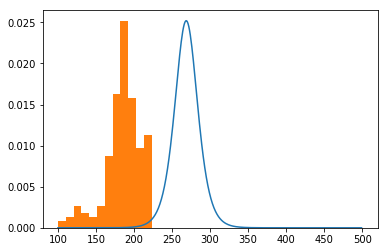

In [191]:
plt.plot(xPred, deriv_low)
plt.hist(np.array(big_frame.freq.astype(int))[~probPred], bins= bins, label = "Buzz", density = True)
plt.show()

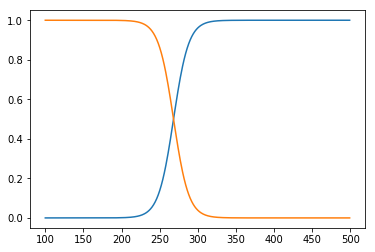

In [156]:
plt.plot(xPred[:,0], probPred[:,0])
plt.plot(xPred[:,0], probPred[:,1])

In [57]:
preds = gmm.predict(np.arange(200, 300, 1).reshape(-1,1))

pd.DataFrame({"dat":np.arange(200, 300, 1), "preds":preds})

,dat,preds
0,200,1
1,201,1
2,202,1
3,203,1
4,204,1
5,205,1
6,206,1
7,207,1
8,208,1
9,209,1


In [35]:
from sklearn.cluster import KMeans

In [36]:
kmm = KMeans(n_clusters=2)

In [37]:
kmm.fit(np.array(big_frame.freq.astype(int)).reshape(-1,1)) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
preds = kmm.predict(np.arange(210, 500, 1).reshape(-1,1))

pd.DataFrame({"dat":np.arange(210, 500, 1), "preds":preds})

,dat,preds
0,210,1
1,211,1
2,212,1
3,213,1
4,214,1
5,215,1
6,216,1
7,217,1
8,218,1
9,219,1


In [42]:
from sklearn.cluster import DBSCAN

In [55]:
dbs = DBSCAN(eps = 199)
dbs.fit(np.array(big_frame.freq.astype(int)).reshape(-1,1))

DBSCAN(algorithm='auto', eps=199, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [56]:
preds = dbs.fit_predict(np.arange(210, 500, 1).reshape(-1,1))

#pd.DataFrame({"dat":np.arange(210, 500, 1), "preds":preds})

In [54]:
np.unique(preds)

array([-1], dtype=int64)